# Mega Millions Project

#### Abstract:
For this project we computed the probabilities of winning a Mega Millions jackpot, and then did different computations on the Mega Millions Winning Numbers Dataset to see if the game was fair or not, and so far, all computations point to the game being fair.

This is a work in progress.

There may be some typos and grammar mistakes; not done proofreading.

This is a personal project.

I have no affiliation with the New York Lottery or the Mega Millions game.


# Introduction
<!-- Hello, we will be working on a new project today.  -->


Suppose we are analyzing the Mega Millions lottery game. We may want to understand our probability of winning the jackpot, and then look at different computations and distributions to see if the game really is fair or not.

### How the game works
The Mega Millions lottery game works by a player first selecting 5 numbers from $[1..70]$ without replacement, and then selects a number from $[1..25]$ without replacement. Next, a machine randomly outputs 5 numbers from $[1..70]$ 
without replacement, and then outputs a single number from $[1..25]$. If the players first 5 selected numbers match the first 5 numbers outputted by the machine, up to permutation, and then their final chosen number mathces th final outputted number, then they win the jackpot. 

### Some Probabilities.

We may ask then, what are the probabilities of winning the jackpot? Since our first five chosen numbers only have to match the first 5 outputted numbers up to permutation, we only have to worry about the probability of a single combination being outputted by the machine. Then we just need to worry about matching our final chosen number to the number outputted from $[1..25]$.

Since every combination is equally likely, we have $$Pr(\text{matching the first 5 numbers}) = \dfrac{1}{{{70}\choose{5}}} $$

and $$Pr(\text{matching the last nunmber}) = \dfrac{1}{25}$$,

and thus $$Pr(\text{ winning the jackpot}) = \dfrac{1}{{{70}\choose{5}}25}$$

We can compute these numbers using the math library comb function:

In [8]:
from math import comb


C = comb(70,5)
print(f'Total number of combinations of five numbers\
 that can be outputted by the machine : {C:,.0f}.')
print(f'Probability of matching the first\
 five outputted numbers: {1/C:.10f}.')




Total number of combinations of five numbers that can be outputted by the machine : 12,103,014.
Probability of matching the first five outputted numbers: 0.0000000826.


In [314]:
print(f'Number of possible final putputs by the machine: {25}.')
print(f'Probability of matching the last outputted numbers: {1/25:.2f}.')

Number of possible final putputs by the machine: 25.
Probability of matching the last outputted numbers: 0.04.


In [10]:
print(f'Total number of combinations that\
 can be outputted by the machine : {C*25:,.0f}.')
print(f'Probability of matching the\
 first five outputted numbers: {(1/C)*(1/25):.15f}.')

Total number of combinations that can be outputted by the machine : 302,575,350.
Probability of matching the first five outputted numbers: 0.000000003304962.


So we have 

$$Pr(\text{matching the first 5 numbers}) = \dfrac{1}{{{70}\choose{5}}} = \dfrac{1}{12,103,014}$$

and

$$Pr( \text{winning the jackpot}) = \dfrac{1}{{{70}\choose{5}}25} = \dfrac{1}{302,575,350}$$




In [316]:
import pandas as pd

In [317]:
path = 'data/'+'Lottery_Mega_Millions_Winning_Numbers__Beginning_2002_20240116.csv'

In [318]:
data = pd.read_csv(path)

In [319]:
data.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,01/12/2024,19 34 35 45 67,7,3.0
1,01/09/2024,12 15 32 33 53,24,3.0
2,01/05/2024,05 23 26 38 44,25,3.0
3,01/02/2024,03 18 27 29 64,1,2.0
4,12/29/2023,11 27 30 62 70,10,3.0


In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        2258 non-null   object 
 1   Winning Numbers  2258 non-null   object 
 2   Mega Ball        2258 non-null   int64  
 3   Multiplier       1355 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 70.7+ KB


In [321]:
data.index = dates = pd.DatetimeIndex(data['Draw Date'])

In [322]:
data.drop('Draw Date',axis = 1, inplace = True)

In [323]:
data.head() #Looking at the result of transformations

,Winning Numbers,Mega Ball,Multiplier
Draw Date,,,
2024-01-12,19 34 35 45 67,7,3.0
2024-01-09,12 15 32 33 53,24,3.0
2024-01-05,05 23 26 38 44,25,3.0
2024-01-02,03 18 27 29 64,1,2.0
2023-12-29,11 27 30 62 70,10,3.0


In [324]:
lottery_nf = data[data.index >= '2017-11-1'].copy()

In [325]:
lottery_nf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 647 entries, 2024-01-12 to 2017-11-03
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Winning Numbers  647 non-null    object 
 1   Mega Ball        647 non-null    int64  
 2   Multiplier       647 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.2+ KB


In [326]:
lottery_nf['Winning Numbers'].iloc[0].split(' ')

['19', '34', '35', '45', '67']

In [327]:
def string_to_tuple(x):
    x = x.split(' ')
    return tuple(sorted([int(s) for s in x],reverse = True))  
    

In [328]:
lottery_nf['five_tuples'] = lottery_nf['Winning Numbers'].apply(string_to_tuple).apply(sorted).apply(tuple)

In [329]:
lottery_nf.head()

,Winning Numbers,Mega Ball,Multiplier,five_tuples
Draw Date,,,,
2024-01-12,19 34 35 45 67,7,3.0,"(19, 34, 35, 45, 67)"
2024-01-09,12 15 32 33 53,24,3.0,"(12, 15, 32, 33, 53)"
2024-01-05,05 23 26 38 44,25,3.0,"(5, 23, 26, 38, 44)"
2024-01-02,03 18 27 29 64,1,2.0,"(3, 18, 27, 29, 64)"
2023-12-29,11 27 30 62 70,10,3.0,"(11, 27, 30, 62, 70)"


### Counting each combination

Every realization of X has a tuple representative.

and using the set of tuple representatives, we can count the number of times each representative to look for evidence of a non uniform distribution.

In [330]:
from collections import Counter

In [331]:
tuple_counts = Counter(lottery_nf['five_tuples'].values)

In [332]:
import matplotlib.pyplot as plt
import seaborn as sns

Using the Counter object again, we can count the number of counts in our dict.

In [333]:
tuple_count_counts = Counter(tuple_counts.values())

In [334]:
print(tuple_count_counts)

Counter({1: 647})


In our data, no combination appears more than once! At least thats some evidence that our lottery machines are not biased  towards a certain number. We can do a hypothesis test of some kind in a future project to see if this evidence is statistically significant.

### Plotting the first number. 

So, we want plot the first number of the combinations and see if they are uniformily distributed over
$[1..70]$.

In [335]:
def get_first(t):
    return t[0]

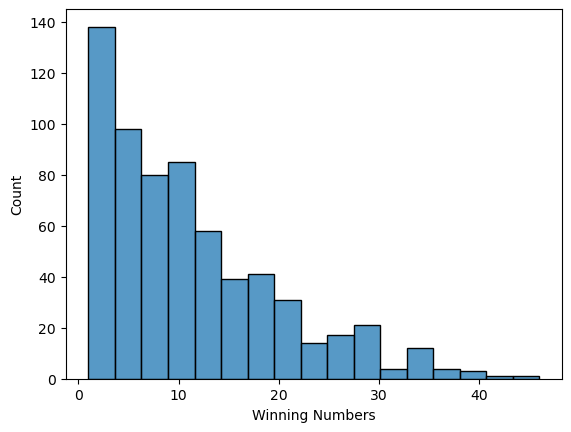

In [336]:
sns.histplot(x = lottery_nf['Winning Numbers'].apply(str.split).apply(get_first).apply(int))
plt.show()

What!? Could this be evidence of bias? Lets hold our horses, and think about this a bit. Maybe there is a more likely explanation. Maybe our entries in the 'Winning Numbers' column are already sorted?

In [337]:
lottery_nf.shape 

(647, 4)

In [338]:
def list_min(l):
    return min([ int(i) for i in l])
    

In [339]:
df1 = lottery_nf['Winning Numbers'].apply(str.split).apply(list_min)
df2 = lottery_nf['Winning Numbers'].apply(str.split).apply(get_first).apply(int)



In [340]:
print((df1 - df2).value_counts())

0    647
Name: Winning Numbers, dtype: int64


Now we see the issue, the first value in each entry in our 'Winning Numbers' column
is also the minimum value of its containing list. Could the entire entry be sorted?

Time for a computation:

In [341]:
def list_int(l):
    return [ int(i) for i in l]

In [342]:
print((lottery_nf['Winning Numbers'].apply(str.split).apply(list_int).apply(np.array)
 - lottery_nf['Winning Numbers'].apply(str.split).apply(list_int).apply(np.array).apply(sorted)
).apply(tuple).value_counts())

(0, 0, 0, 0, 0)    647
Name: Winning Numbers, dtype: int64


The above code sorts each list and from it subtracts its sorted version, and in this case, every list is also sorted! A much likelier explanation for the non uniform distribution is that every list was already sorted. The likelihood of every list also being sorted is just too small. Maybe in a future project we can compute this probablity and do a hypothesis test.